<a href="https://colab.research.google.com/github/Loop3D/Kalgoorlie_3Dmodelling/blob/main/report_files_stratigraphy/00_Thicknesses%20calculation%20per%20unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install geopandas
    !git clone https://github.com/Loop3D/Kalgoorlie_fault_network.git
    %cd Kalgoorlie_fault_network/report_files_stratigraphy

else:
      print('Not running on CoLab, nothing to do')

Not running on CoLab, nothing to do


In [18]:
from math import radians, sin, sqrt
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import os

In [19]:
path_shp = "./data/thickness_sampling_points"

In [20]:
# IMPORT THE SHP
thick_points = gpd.read_file(
    os.path.join(path_shp, "thick_sampl_Mafics.shp"))

thick_points = pd.DataFrame({
    'X': thick_points.geometry.x,
    'Y': thick_points.geometry.y,
    'Z': thick_points.DEM,
    'strike': thick_points.strike, 
    'dip': thick_points.dip, 
    'order': thick_points.order, 
    'name': thick_points.name
})

In [21]:
results = []

for unit in np.unique(thick_points['name']):
    
    # how many sampling points per unit:
    n = len(thick_points[thick_points['name']==unit])
    
    values = []
    for i in range(1, int(n/2+1)):
        
        subset = thick_points[(thick_points['name']==unit) & (thick_points['order']==i)].reset_index(drop=True)
        
        x1 = subset['X'][0]
        x2 = subset['X'][1]

        y1 = subset['Y'][0]
        y2 = subset['Y'][1]

        z1 = subset['Z'][0]
        z2 = subset['Z'][1]
        
        dip = subset['dip'][0]
        
        L = sqrt(((x2-x1)**2) + ((y2-y1)**2) + ((z2-z1)**2))
        
        thickness = L * sin(radians(dip))
    
        values.append(thickness)
    
    results.append(pd.DataFrame({'name': unit, 'n': n, 'values': [values], 'avg_thickness': np.mean(values)}))

    
thicknesses_mafics = pd.concat(results).reset_index(drop=True)
thicknesses_mafics

,name,n,values,avg_thickness
0,Lower_Mafi,14,"[505.25114343179393, 2153.0149603314435, 2625....",2237.518300
1,Middle_Maf,6,"[4052.0970266317754, 1659.6857249441464, 1507....",2406.510830
2,Upper_Mafi,26,"[3801.305991785518, 5170.092133304724, 3275.43...",3065.524365


In [22]:
# IMPORT THE SHP
thick_points = gpd.read_file(
    os.path.join(path_shp, "thick_sampl_gabbros.shp"))

thick_points = pd.DataFrame({
    'X': thick_points.geometry.x,
    'Y': thick_points.geometry.y,
    'Z': thick_points.DEM,
    'strike': thick_points.strike, 
    'dip': thick_points.dip, 
    'order': thick_points.order, 
    'name': thick_points.name
})

results = []

for unit in np.unique(thick_points['name']):
    
    # how many sampling points per unit:
    n = len(thick_points[thick_points['name']==unit])
    
    values = []
    for i in range(1, int(n/2+1)):
        
        subset = thick_points[(thick_points['name']==unit) & (thick_points['order']==i)].reset_index(drop=True)
        
        x1 = subset['X'][0]
        x2 = subset['X'][1]

        y1 = subset['Y'][0]
        y2 = subset['Y'][1]

        z1 = subset['Z'][0]
        z2 = subset['Z'][1]
        
        dip = subset['dip'][0]
        
        L = sqrt(((x2-x1)**2) + ((y2-y1)**2) + ((z2-z1)**2))
        
        thickness = L * sin(radians(dip))
    
        values.append(thickness)
    
    results.append(pd.DataFrame({'name': unit, 'n': n, 'values': [values], 'avg_thickness': np.mean(values)}))

    
thicknesses_gabbros = pd.concat(results).reset_index(drop=True)
thicknesses_gabbros

,name,n,values,avg_thickness
0,Mts_G,8,"[1770.28060366182, 1589.5982226010385, 1273.86...",1732.414129
1,OraBanda_G,10,"[1236.8869863542352, 1686.2838773916744, 1655....",1574.579666


In [23]:
# IMPORT THE SHP
thick_points = gpd.read_file(
    os.path.join(path_shp, "thick_sampl_BF.shp"))

thick_points = pd.DataFrame({
    'X': thick_points.geometry.x,
    'Y': thick_points.geometry.y,
    'Z': thick_points.DEM,
    'strike': thick_points.strike, 
    'dip': thick_points.dip, 
    'order': thick_points.order, 
    'name': thick_points.name
})

results = []

for unit in np.unique(thick_points['name']):
    
    # how many sampling points per unit:
    n = len(thick_points[thick_points['name']==unit])
    
    values = []
    for i in range(1, int(n/2+1)):
        
        subset = thick_points[(thick_points['name']==unit) & (thick_points['order']==i)].reset_index(drop=True)
        
        x1 = subset['X'][0]
        x2 = subset['X'][1]

        y1 = subset['Y'][0]
        y2 = subset['Y'][1]

        z1 = subset['Z'][0]
        z2 = subset['Z'][1]
        
        dip = subset['dip'][0]
        
        L = sqrt(((x2-x1)**2) + ((y2-y1)**2) + ((z2-z1)**2))
        
        thickness = L * sin(radians(dip))
    
        values.append(thickness)
    
    results.append(pd.DataFrame({'name': unit, 'n': n, 'values': [values], 'avg_thickness': np.mean(values)}))

    
thicknesses_BF = pd.concat(results).reset_index(drop=True)
thicknesses_BF

,name,n,values,avg_thickness
0,BF,38,"[2707.415200951939, 2719.776356091308, 2917.12...",2348.685571


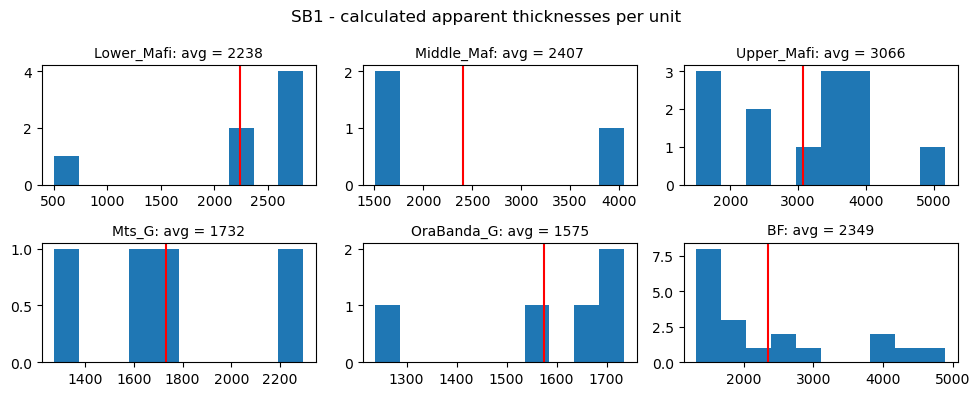

In [24]:
# QUICK HISTOGRAM OF THE THICKNESSES
fig, ax = plt.subplots(2, 3, figsize = (10,4))
ax = ax.ravel()

#mafics
ax[0].hist(thicknesses_mafics['values'][0])
ax[0].set_title("{}: avg = {}".format(thicknesses_mafics['name'][0], round(thicknesses_mafics['avg_thickness'][0])), 
                fontsize = 10)
ax[0].axvline(x = thicknesses_mafics['avg_thickness'][0], ymin = ax[0].get_ylim()[0], ymax = ax[0].get_ylim()[1], c='red')

ax[1].hist(thicknesses_mafics['values'][1])
ax[1].set_title("{}: avg = {}".format(thicknesses_mafics['name'][1], round(thicknesses_mafics['avg_thickness'][1])), 
                fontsize = 10)
ax[1].axvline(x = thicknesses_mafics['avg_thickness'][1], ymin = ax[1].get_ylim()[0], ymax = ax[1].get_ylim()[1], c='red')

ax[2].hist(thicknesses_mafics['values'][2])
ax[2].set_title("{}: avg = {}".format(thicknesses_mafics['name'][2], round(thicknesses_mafics['avg_thickness'][2])), 
                fontsize = 10)
ax[2].axvline(x = thicknesses_mafics['avg_thickness'][2], ymin = ax[2].get_ylim()[0], ymax = ax[2].get_ylim()[1], c='red')

#gabbros
ax[3].hist(thicknesses_gabbros['values'][0])
ax[3].set_title("{}: avg = {}".format(thicknesses_gabbros['name'][0], round(thicknesses_gabbros['avg_thickness'][0])), 
                fontsize = 10)
ax[3].axvline(x = thicknesses_gabbros['avg_thickness'][0], ymin = ax[3].get_ylim()[0], ymax = ax[3].get_ylim()[1], c='red')

ax[4].hist(thicknesses_gabbros['values'][1])
ax[4].set_title("{}: avg = {}".format(thicknesses_gabbros['name'][1], round(thicknesses_gabbros['avg_thickness'][1])), 
                fontsize = 10)
ax[4].axvline(x = thicknesses_gabbros['avg_thickness'][1], ymin = ax[4].get_ylim()[0], ymax = ax[4].get_ylim()[1], c='red')

# BF
ax[5].hist(thicknesses_BF['values'][0])
ax[5].set_title("{}: avg = {}".format(thicknesses_BF['name'][0], round(thicknesses_BF['avg_thickness'][0])), 
                fontsize = 10)
ax[5].axvline(x = thicknesses_BF['avg_thickness'][0], ymin = ax[5].get_ylim()[0], ymax = ax[5].get_ylim()[1], c='red')

plt.suptitle("SB1 - calculated apparent thicknesses per unit")
plt.tight_layout()